### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [196]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [197]:
#1
url = "https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv"
df = pd.read_csv(url)
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [198]:
#2
df.info()

# conclusion
# Demographic Diversity: With full data on gender and international status, this dataset can give insights into the demographic makeup of applicants, but race analysis will be limited due to missing values.
# Academic and Professional Background: The complete data on GPA, GMAT, and work experience offers robust opportunities to explore the relationship between these variables and other factors (such as gender or major) to admission outcomes.
# Admission Data Limitation: Only 1,000 of the 6,194 applicants have an admission status recorded, which may hinder a complete analysis of which factors most strongly correlate with acceptance.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [199]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)

print(admission_counts)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [200]:
#3b
race_counts = df['race'].value_counts(dropna=False)

print(race_counts)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [201]:
#4
df['admission'].fillna('Deny', inplace=True)
df['race'].fillna('Other', inplace=True)

<ipython-input-201-4c52867b0f1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Deny', inplace=True)
<ipython-input-201-4c52867b0f1c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [202]:
#5
missing_values = df.isnull().sum()
missing_values

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [203]:
# 6
df.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [204]:
#7
description = df.describe()
description

# conclusion
# GPA: The average GPA is 3.35, with most applicants having a GPA between 3.2 and 3.5. The lowest GPA is 2.5, and the highest is 4.0.
# GMAT: The average GMAT score is 650, with most applicants scoring between 600 and 700. Scores range from 400 to 800, indicating a broad range of academic preparedness.
# Work Experience: On average, applicants have around 5 years of work experience, with the majority having between 4 and 6 years. Some applicants have no experience, while others have as many as 10 years.

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

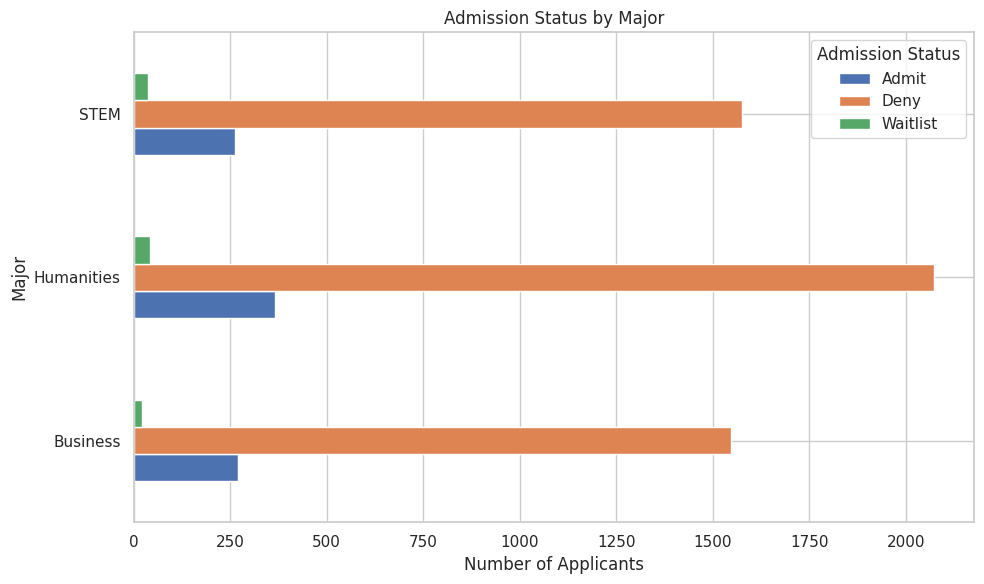

In [205]:
#8
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

admission_major_counts = df.groupby(['major', 'admission'])['admission'].count().unstack()
admission_major_counts.plot(kind='barh', figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.tight_layout()
plt.show()

# conclusion
# The chart illustrates the distribution of applicants across three majors: STEM, Humanities, and Business.
# the Business major has the highest number of applicants, closely followed by Humanities, while STEM has the fewest.
# In terms of admission outcomes, the majority of STEM applicants were denied, with only a small number admitted and very few placed on the waitlist.
# The Humanities major shows a more balanced distribution, with a significant number of admitted applicants compared to those denied and waitlisted.
# Similarly, the Business major also has a considerable number of admitted applicants, but it, too, exhibits a high denial rate, indicating greater competition.
# Overall, the data highlights the varying admission rates across these majors, suggesting that STEM and Business fields may be more competitive than Humanities, which appears to be more accommodating for applicants.
# This information could be valuable for prospective students as they consider their chances of admission when choosing a major.

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

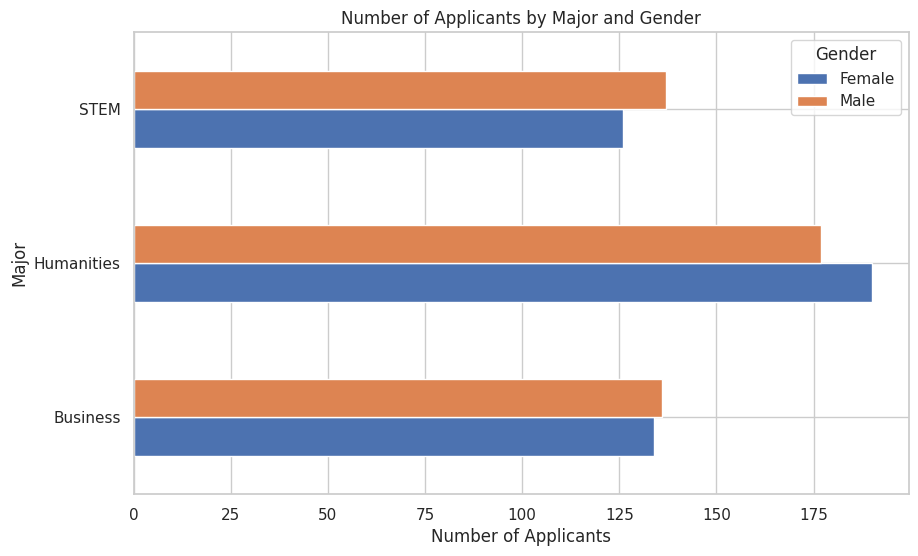

In [206]:
#9
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
admit_df = df[df['admission'] == 'Admit']
gender_major_counts = admit_df.groupby(['major', 'gender'])['gender'].count().unstack()
gender_major_counts.plot(kind='barh', figsize=(10, 6))

plt.title('Number of Applicants by Major and Gender')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.show()

# conclusion
# The chart provides insights into the gender distribution of applicants across three majors: STEM, Humanities, and Business. Here’s a summary of the observations:
# The Humanities major has the highest number of applicants overall, with a significantly greater number of female applicants compared to male applicants.
# The Business major also shows a similar trend, with more female applicants than male, although the numbers are closer together than in Humanities.
# In contrast, the STEM major has more male applicants than female, indicating a gender disparity in this field.
# Overall, the data suggests that while Humanities and Business attract a higher number of female applicants, STEM remains more male-dominated.
# This trend may reflect broader societal influences on gender and major selection, highlighting areas where efforts to encourage female participation in STEM could be beneficial.

10. create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-207-d703e6f0937a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='admission', y='gpa', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a fu

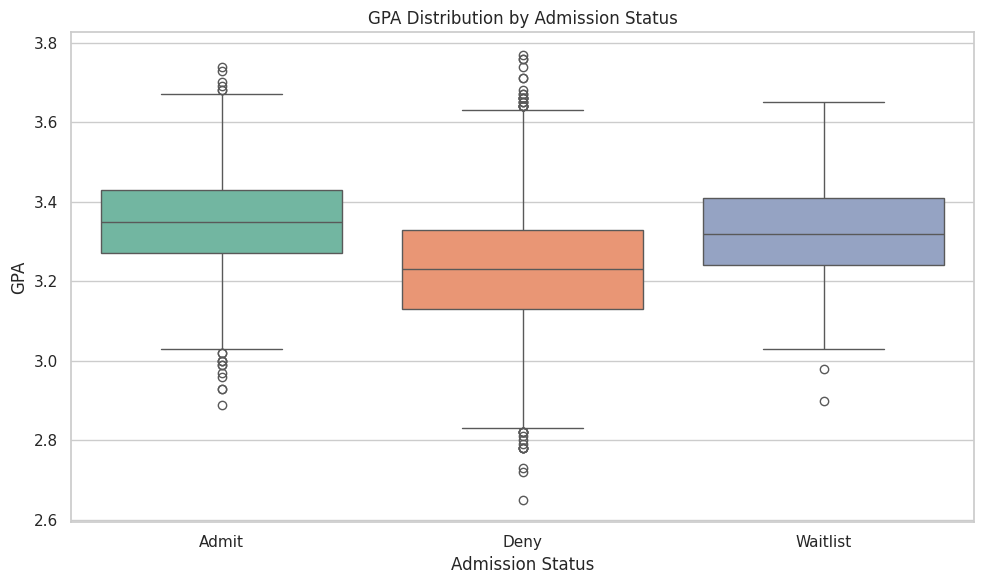

In [207]:
#10
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='admission', y='gpa', palette='Set2')
plt.title('GPA Distribution by Admission Status')
plt.xlabel('Admission Status')
plt.ylabel('GPA')

plt.tight_layout()
plt.show()

# conclusion
# This box plot visualizes the distribution of GPAs for applicants based on their admission status (Admit, Deny, Waitlist).
# It shows that admitted students tend to have slightly higher GPAs than those waitlisted or denied.
# There's also some overlap in GPA ranges across the three groups, indicating GPA alone isn't the sole determinant of admission.
# The outliers (dots outside the main box) represent individual applicants with unusually high or low GPAs within each admission group.

11. create your own insightful visualization and explain it in at least 2 sentences

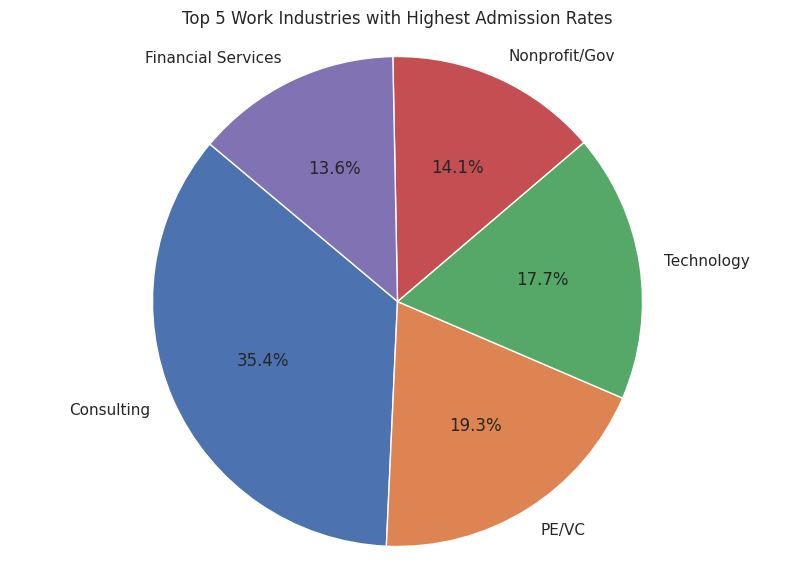

In [208]:
#11
import matplotlib.pyplot as plt
work_industry_counts = admit_df['work_industry'].value_counts()
top_5 = work_industry_counts.head(5)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Work Industries with Highest Admission Rates')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

# conclusion
# The chart displays the top 5 work industries with the highest admission rates. Consulting is the leading industry, accounting for 35.4% of admissions.
# PE/VC follows with 19.3%, then Technology at 17.7%, Nonprofit/Gov at 14.1%, and finally Financial Services at 13.6%.

12. encode categorical columns and display the results

In [209]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['international'] = label_encoder.fit_transform(df['international'])
df['major'] = label_encoder.fit_transform(df['major'])
df['race'] = label_encoder.fit_transform(df['race'])
df['work_exp'] = label_encoder.fit_transform(df['work_exp'])
df['work_industry'] = label_encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,Deny
2,0,1,3.30,0,3,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,Deny
4,1,0,3.35,2,2,590.0,4,1,Deny


In [210]:
#12b
#encode y
df['admission'] = label_encoder.fit_transform(df['admission'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,1
2,0,1,3.30,0,3,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,1
4,1,0,3.35,2,2,590.0,4,1,1


13. create a heatmap to see the correlation and explain the conclusion

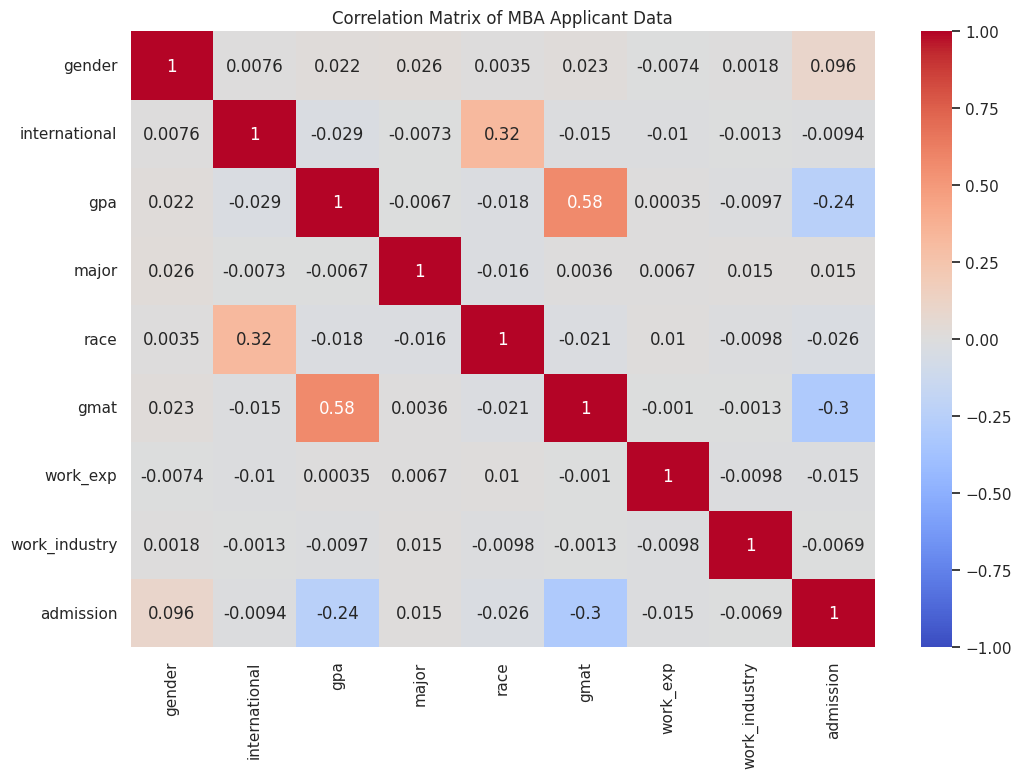

In [211]:
#13
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')
plt.show()

# conclusion
# The chart provides insights into the relationships between various factors affecting MBA applicants, measured by correlation coefficients.
# A notable positive correlation exists between GPA and GMAT scores (0.58), suggesting that higher GPAs are associated with better GMAT performance.
# Additionally, a moderate positive correlation is observed between international status and race (0.32), indicating a relationship that warrants further exploration.
# On the other hand, there are moderate negative correlations, such as between admission and GMAT scores (-0.3), which imply that higher GMAT scores may correspond with lower admission rates,
# potentially reflecting a competitive filtering process in applicant selection. Similarly, admission also exhibits a negative correlation with race (-0.24),
# suggesting that certain racial demographics might face challenges in the admission process. Most other correlations are weak,
# indicating minimal relationships among various factors like gender, work experience, and work industry.
# Overall, the correlation matrix highlights significant relationships that could inform further research or policy adjustments in MBA admissions,
# particularly emphasizing the interplay between GPA, GMAT, and admission outcomes.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [213]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

dtree = RandomForestClassifier(n_estimators=200, random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Lisa_data = {
    'gender': 0, 'international': 1, 'gpa' : df['gpa'].mean(), 'major': 0, 'race' : 0, 'gmat' : 580, 'work_exp' : 2, 'work_industry': 3
}
df_lisa = pd.DataFrame([Lisa_data])
predict = dtree.predict(df_lisa)
print("Predicted admission status (encoded): {}".format(predict))

admission = label_encoder.inverse_transform(predict)

print("The admission status of Lisa is:",admission[0])

Accuracy: 0.8305084745762712
Predicted admission status (encoded): [1]
The admission status of Lisa is: Deny
